<a href="https://colab.research.google.com/github/mohd-sahil/Airbnb-Bookings-Analysis-EDA/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = "/content/drive/MyDrive/Data Science - Capstone Projects/Airbnb Bookings Analysis - Mohd Sahil/Airbnb NYC 2019.csv"

df = pd.read_csv(dataset)

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Null Values

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#replacing all NaN values
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'last_review':0}, inplace=True)
df.fillna({'host_name':'unknown_host_name'}, inplace=True)
df.fillna({'name':'unknown_name'}, inplace=True)

#examing changes
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Removing unnecessary data

In [10]:
df.drop(['id','reviews_per_month','last_review'], axis=1, inplace=True)


##  What can we learn about different hosts and areas?

  neighbourhood_group  Total Airbnb Hosts
0           Manhattan               21661
1            Brooklyn               20104
2              Queens                5666
3               Bronx                1091
4       Staten Island                 373 





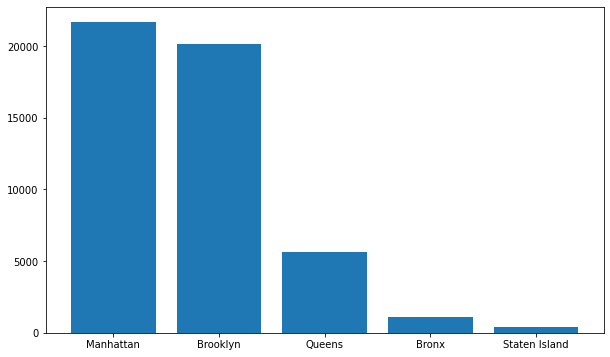

In [11]:
# nghbrhd_grp counts (it shows which ngh_grp has highest hosts available)


df_nghGrp_host = df.groupby(['neighbourhood_group'])['host_id'].count().sort_values(ascending = False).to_frame(name ='Total Airbnb Hosts').reset_index()
print(df_nghGrp_host,'\n\n\n')


# Visualization
plt.figure(figsize=(10,6))
plt.bar(df_nghGrp_host['neighbourhood_group'], height = df_nghGrp_host['Total Airbnb Hosts'],width = 0.8)
plt.show()

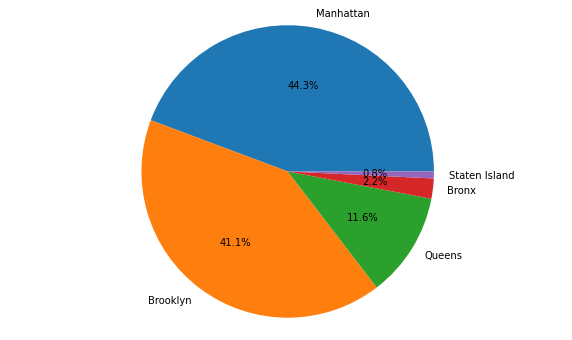

In [12]:
# Using pie chart

hosts = df_nghGrp_host['Total Airbnb Hosts']

ngh_grp = df_nghGrp_host['neighbourhood_group']


plt.figure(figsize=(10,6))
plt.pie(hosts,labels = ngh_grp,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### approximately 85% of the hosts are in **Manhattan & Brooklyn**
### Staten Island has less than 1% hosts

---

## What can we learn from predictions? (ex: locations, prices, reviews, etc)

  neighbourhood_group  Total Reviews
0            Brooklyn         486574
1           Manhattan         454569
2              Queens         156950
3               Bronx          28371
4       Staten Island          11541 





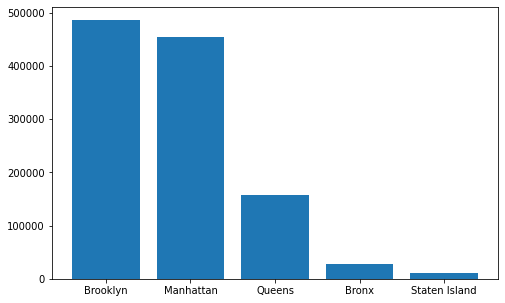

In [13]:
# Areas v/s number of reviews (it shows which ngh_grp has highest reviews)


df_nghGrp_num_rvws = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().sort_values(ascending = False).to_frame(name ='Total Reviews').reset_index()
print(df_nghGrp_num_rvws,'\n\n\n')

# visualization
plt.rcParams['figure.figsize'] = (8, 5)
plt.bar(df_nghGrp_num_rvws['neighbourhood_group'], height = df_nghGrp_num_rvws['Total Reviews'],width = 0.8 )
plt.show()


### **Brooklyn & Manhattan** are the most reviwed areas (more popular)
### whereas **Staten Is & Bronx** are at the bottom (least popular)
---

  neighbourhood_group  Mean Price
0           Manhattan  196.875814
1            Brooklyn  124.383207
2       Staten Island  114.812332
3              Queens   99.517649
4               Bronx   87.496792 





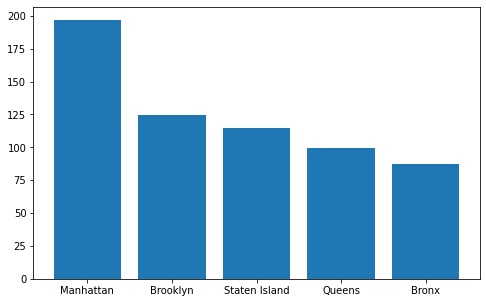

In [14]:
# Areas v/s price

df_nghgrp_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).to_frame(name ='Mean Price').reset_index()
print(df_nghgrp_price,'\n\n\n')

plt.bar(df_nghgrp_price['neighbourhood_group'],df_nghgrp_price['Mean Price'], width = 0.8)
plt.show()


### Manhattan is the most expensive area
### whereas **Bronx** is the cheapest
---

  neighbourhood_group  Mean Availability
0       Staten Island         199.678284
1               Bronx         165.758937
2              Queens         144.451818
3           Manhattan         111.979410
4            Brooklyn         100.232292 





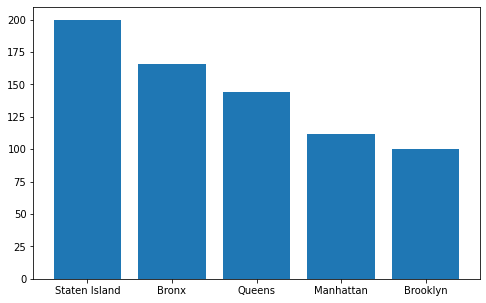

In [15]:
# Areas v/s Availability

df_nghGrp_avlbl  = df.groupby(['neighbourhood_group'])['availability_365'].mean().sort_values(ascending = False).to_frame(name ='Mean Availability').reset_index()

print(df_nghGrp_avlbl,'\n\n\n')

plt.bar(df_nghGrp_avlbl['neighbourhood_group'],df_nghGrp_avlbl['Mean Availability'], width = 0.8)
plt.show()


### In terms of availability **Staten Island** is at the top (Staten Is. is also the least reviwed, that's why availability is not the issue here)
### whereas **Manhattan & Brooklyn** are the busiest
---

     price  Avg Reviews
0        0    34.272727
1       10    14.176471
2       11    37.666667
3       12     2.000000
4       13     9.000000
..     ...          ...
669   7703     0.000000
670   8000     1.000000
671   8500     2.000000
672   9999     2.333333
673  10000     2.333333

[674 rows x 2 columns] 





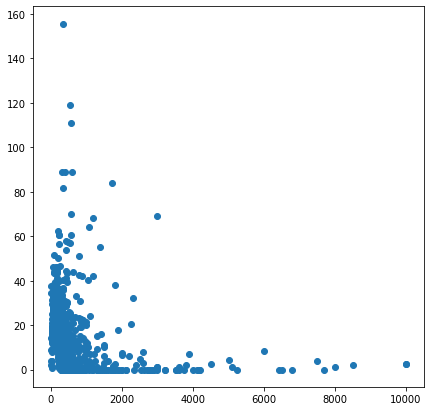

In [16]:
# price v/s numbr of reviews

df_price_no_of_rvws = df.groupby(['price'])['number_of_reviews'].mean().to_frame(name ='Avg Reviews').reset_index()
print(df_price_no_of_rvws,'\n\n\n')

# Visualization

plt.figure(figsize=(7,7))
plt.scatter(df_price_no_of_rvws['price'],df_price_no_of_rvws['Avg Reviews'])
plt.show()


### From the above Analysis we can say that most people prefer to stay in place where price is less

---

##  Which hosts are the busiest and why? <br>

     host_id          host_name  total listings
0  219517861       Sonder (NYC)             327
1  107434423         Blueground             232
2   30283594               Kara             121
3  137358866             Kazuya             103
4   16098958     Jeremy & Laura              96
5   12243051             Sonder              96
6   61391963  Corporate Housing              91
7   22541573                Ken              87
8  200380610            Pranjal              65
9    7503643               Vida              52 





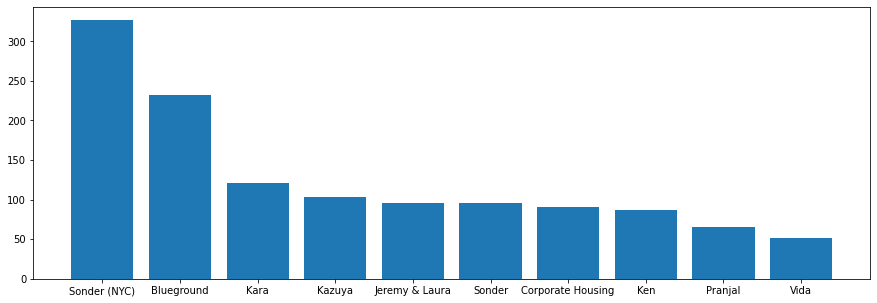

In [17]:
# which host has maximum listings

df_hosts_ids_counts = df.groupby(['host_id','host_name'])['calculated_host_listings_count'].max().sort_values(ascending = False).head(10)
df_hosts_ids_counts = df_hosts_ids_counts.to_frame(name ='total listings').reset_index()
print(df_hosts_ids_counts,'\n\n\n')

plt.rcParams['figure.figsize'] = (15, 5)
plt.bar(df_hosts_ids_counts['host_name'],df_hosts_ids_counts['total listings'])
plt.show()


     host_id          host_name  total listings  mean reviews
0  219517861       Sonder (NYC)             327      3.917431
1  107434423         Blueground             232      0.125000
2   30283594               Kara             121      0.537190
3  137358866             Kazuya             103      0.844660
4   16098958     Jeremy & Laura              96      1.437500
5   12243051             Sonder              96      0.447917
6   61391963  Corporate Housing              91      4.582418
7   22541573                Ken              87      0.632184
8  200380610            Pranjal              65      0.015385
9    7503643               Vida              52      4.653846 





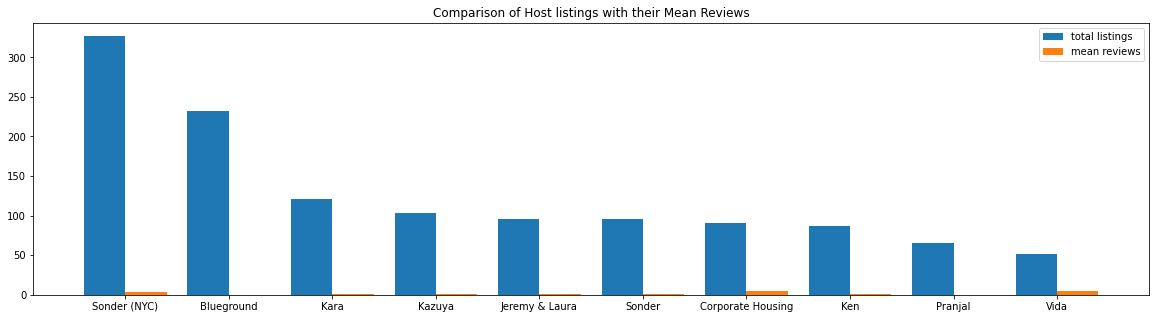

In [18]:
# Comparison between number of listings and Average Reviews


df_hosts_rvws = df.groupby(['host_id','host_name'])['number_of_reviews'].mean().sort_values(ascending = False).to_frame(name ='mean reviews').reset_index()


# now join the two

df_host_listing_rvws = pd.merge(df_hosts_ids_counts[['host_id','host_name','total listings']],df_hosts_rvws[['host_id','mean reviews']],how = 'inner', on = 'host_id')
print(df_host_listing_rvws,'\n\n\n')


# visualization


plt.rcParams['figure.figsize'] = (20, 5)


width = 0.4

x = df_host_listing_rvws['host_name']
total_listings = df_host_listing_rvws['total listings']
mean_reviews = df_host_listing_rvws['mean reviews']

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, total_listings, width, label = 'total listings')
plt.bar(x_axis + 0.2, mean_reviews, width, label = 'mean reviews')

plt.xticks(x_axis, x)
plt.title("Comparison of Host listings with their Mean Reviews")
plt.legend()
plt.show()



### Note - More number of Airbnb listings not resulting into more popularity among guests.
---

    host_id       host_name  mean reviews
0  47621202            Dona    602.500000
1   4734398              Jj    599.333333
2   2369681           Carol    540.000000
3  12949460             Asa    488.000000
4    792159           Wanda    480.000000
5  37312959            Maya    454.600000
6   2321321           Lloyd    454.000000
7    277379           Agnes    448.500000
8    307962  Dennis & Naoko    441.000000
9  97086824         Miss Dy    434.000000 





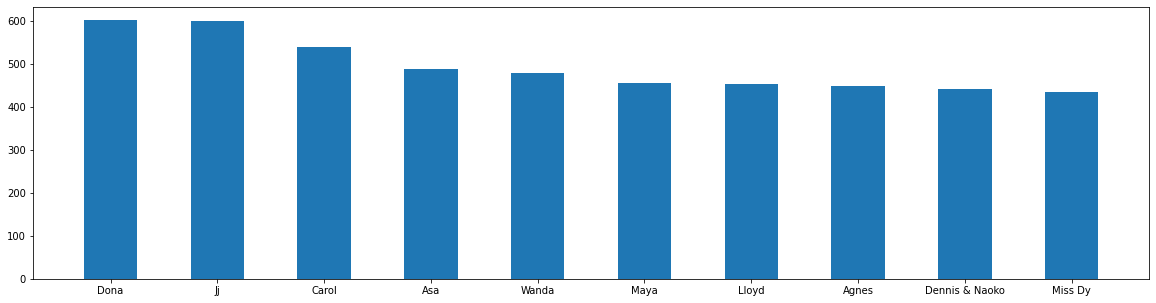

In [19]:
# busiest can be find by Mean of number of reviews

df_hosts_rvws = df.groupby(['host_id','host_name'])['number_of_reviews'].mean().sort_values(ascending = False).head(10)
df_hosts_rvws = df_hosts_rvws.to_frame(name ='mean reviews').reset_index()
print(df_hosts_rvws,'\n\n\n')


plt.rcParams['figure.figsize'] = (20, 5)
plt.bar(df_hosts_rvws['host_name'],df_hosts_rvws['mean reviews'], width = 0.5)
plt.show()

## For all top hosts <br>
### room types : private room or entire home/apartment <br>
### location: Queens, Manhattan, Brooklyn
### price: All the top hosts have prices less than 100 (except one)


---

